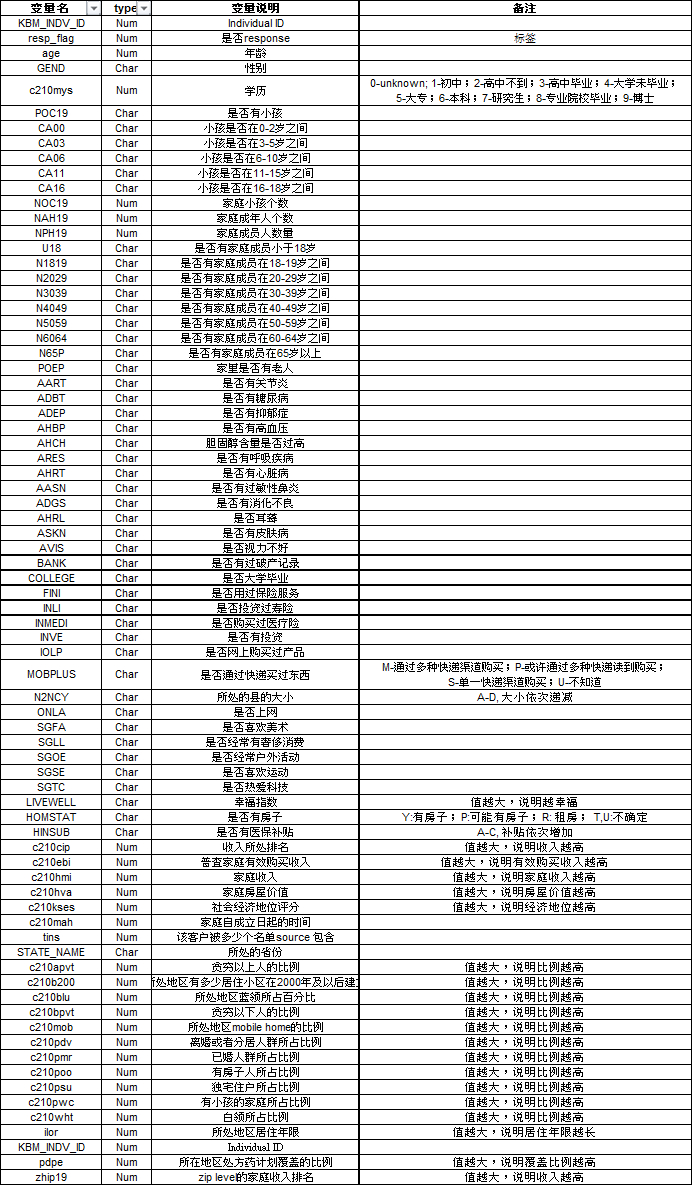

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('max_columns',100)  # 显示100列数据

In [3]:
df=pd.read_csv(r"C:\Users\CDA\PYTHON\机器学习\案例：保险行业数据分析\data\ma_resp_data_temp.csv",header=0)
df.head()

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,1.0,5,3,8,Y,Y,C,CA,67.0,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,P,A,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,4.0,0,1,1,U,Y,U,CA,76.0,98,6.0,15,2,69.0,69,84.0,494.0,97,56.0,0,4,15,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,M,A,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,3.0,0,1,1,U,Y,U,CA,67.0,88,NaN,26,12,32.0,44,50.0,516.0,83,50.0,0,4,17,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,S,B,N,N,N,Y,Y,N,Y,Y,Y,N,N,N,N,N,N,1.0,1,4,5,Y,Y,C,CA,71.0,96,NaN,15,4,82.0,82,103.0,473.0,105,52.0,0,4,14,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,M,B,N,N,N,N,N,N,Y,Y,N,Y,Y,N,Y,Y,N,3.0,0,1,1,U,U,A,CA,75.0,88,NaN,9,12,38.0,47,55.0,523.0,89,50.0,10,4,29,32,13,36.0,15,65.0,9.0,NaN,37,4,3


## 了解数据

In [4]:
#查看数据的形状
df.shape

(43666, 76)

数据中的标签是‘resp_flag’,查看一下标签的取值种类

In [5]:
df.resp_flag.value_counts()#这是一个二分类问题

0    26177
1    17489
Name: resp_flag, dtype: int64

In [6]:
#查看数据的类型
df.dtypes

KBM_INDV_ID      int64
resp_flag        int64
GEND            object
CA00             int64
CA03             int64
CA06             int64
CA11             int64
CA16             int64
AART            object
ADBT            object
ADEP            object
AHBP            object
AHCH            object
ARES            object
AHRT            object
AASN            object
ADGS            object
AHRL            object
ASKN            object
AVIS            object
BANK            object
COLLEGE         object
FINI            object
INLI            object
INMEDI          object
INVE            object
IOLP            object
MOBPLUS         object
N2NCY           object
NY8Y9           object
                ...   
NAH19            int64
NPH19            int64
POC19           object
HOMSTAT         object
HINSUB          object
STATE_NAME      object
age            float64
c210apvt         int64
c210b200       float64
c210blu          int64
c210bpvt         int64
c210cip        float64
c210ebi    

In [7]:
# 记录最初的数据类型，保存为excel文件，方便之后对比
type_first = df.dtypes
type_first.to_excel('./output/var_type_original.xlsx')

In [8]:
#将id转换成object
df['KBM_INDV_ID'] = df['KBM_INDV_ID'].astype('object')

In [9]:
#通过describe()方法查看数值型字段的一些描述性统计信息
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resp_flag,43666.0,0.400518,0.490009,0.0,0.0,0.0,1.0,1.0
CA00,43666.0,0.267806,0.996459,0.0,0.0,0.0,0.0,6.0
CA03,43666.0,0.214034,0.886914,0.0,0.0,0.0,0.0,7.0
CA06,43666.0,0.381968,1.178281,0.0,0.0,0.0,0.0,7.0
CA11,43666.0,0.313196,1.047293,0.0,0.0,0.0,0.0,7.0
CA16,43666.0,0.224316,0.858203,0.0,0.0,0.0,0.0,7.0
LIVEWELL,43661.0,2.842125,1.172255,1.0,2.0,3.0,4.0,6.0
NOC19,43666.0,0.465717,1.045087,0.0,0.0,0.0,0.0,9.0
NAH19,43666.0,2.080818,1.215852,0.0,1.0,2.0,3.0,9.0
NPH19,43666.0,2.546535,1.903632,0.0,1.0,2.0,3.0,16.0


In [10]:
#可以将这个信息保留下来
describe = df.describe().T
describe.to_excel('./output/describe_var.xlsx')

## 统计每一列中有多少空值

In [11]:
#检查缺失列的数量
len(df.columns)-df.dropna(axis=1).shape[1]#dropna,过滤缺失值

20

In [12]:
#统计格列中缺失值的数量
NA=df.isnull().sum()
NA

KBM_INDV_ID     0
resp_flag       0
GEND            0
CA00            0
CA03            0
CA06            0
CA11            0
CA16            0
AART            0
ADBT            0
ADEP            0
AHBP            0
AHCH            0
ARES            0
AHRT            0
AASN           10
ADGS            0
AHRL            0
ASKN            8
AVIS            0
BANK            0
COLLEGE         8
FINI            0
INLI            0
INMEDI          0
INVE            0
IOLP            0
MOBPLUS         7
N2NCY          10
NY8Y9           9
               ..
NAH19           0
NPH19           0
POC19           0
HOMSTAT        10
HINSUB         11
STATE_NAME      0
age             4
c210apvt        0
c210b200        5
c210blu         0
c210bpvt        0
c210cip         2
c210ebi         0
c210hmi         7
c210hva        15
c210kses        0
c210mah        15
c210mob         0
c210mys         0
c210pdv         0
c210pmr         0
c210poo         0
c210psu        23
c210pwc         0
c210wht   

In [13]:
#重置索引
NA = NA.reset_index()
NA.head()

,index,0
0,KBM_INDV_ID,0
1,resp_flag,0
2,GEND,0
3,CA00,0
4,CA03,0


In [14]:
#重置列名
NA.columns=['Var','NA_count']
NA.head()

,Var,NA_count
0,KBM_INDV_ID,0
1,resp_flag,0
2,GEND,0
3,CA00,0
4,CA03,0


In [15]:
#过滤出大于0的数据
NA = NA[NA.NA_count>0].reset_index(drop=True)
NA.head()

,Var,NA_count
0,AASN,10
1,ASKN,8
2,COLLEGE,8
3,MOBPLUS,7
4,N2NCY,10


In [16]:
#把空值个数换算成比例
NA.NA_count/df.shape[0]

0     0.000229
1     0.000183
2     0.000183
3     0.000160
4     0.000229
5     0.000206
6     0.000183
7     0.000115
8     0.000229
9     0.000252
10    0.000092
11    0.000115
12    0.000046
13    0.000160
14    0.000344
15    0.000344
16    0.000527
17    0.000321
18    0.000137
19    0.000344
Name: NA_count, dtype: float64

## 查看数据中是否有重复值

In [17]:
df[df.duplicated()]#没有重复列

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19


## 可视化查看数据分布

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [19]:
# 支持中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

### 看一下目标变量是否平衡

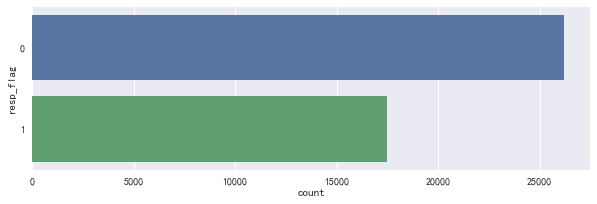

In [20]:
plt.figure(figsize=(10,3))
sns.countplot(y='resp_flag',data=df)
plt.show()

In [21]:
#计算购买用户和未购买用户的比例
df.resp_flag.sum()/df.resp_flag.shape[0]

0.4005175651536665

In [22]:
1-df.resp_flag.sum()/df.resp_flag.shape[0]

0.5994824348463335

### 绘制年龄分布情况

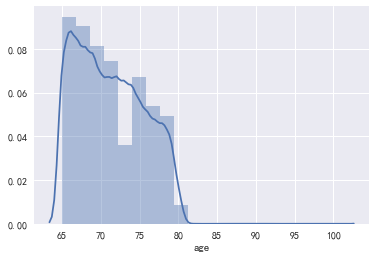

In [23]:
sns.distplot(df['age'],bins=20)

### 两类样本的年龄分布

#### kdeplot(举个例子)

核密度估计（kernel density estimation），通过图可以直观的看到数据样本本身的分布特征

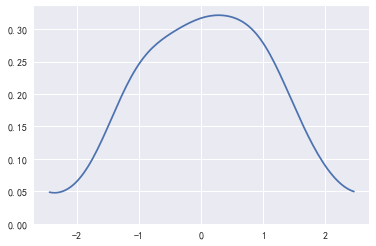

In [24]:
X=np.random.randn(100)
sns.kdeplot(X,cut=0)

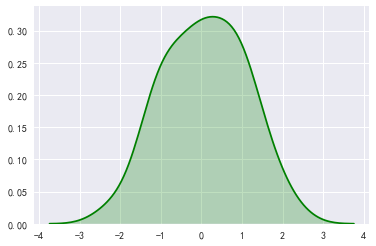

In [25]:
sns.kdeplot(X,shade=True,color='g')

Text(0, 0.5, 'Density')

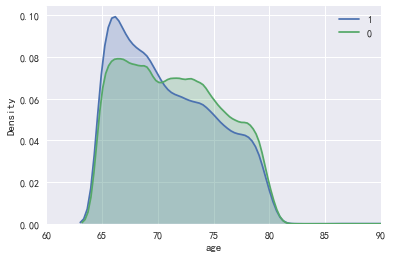

In [26]:
sns.kdeplot(df.age[df.resp_flag==1],label='1',shade=True)
sns.kdeplot(df.age[df.resp_flag==0],label='0',shade=True)
plt.xlim([60,90])
plt.xlabel('age')
plt.ylabel('Density')

### 探索数据的性别比例

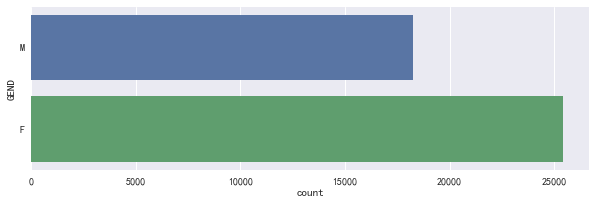

In [27]:
#查看性别比例
plt.figure(figsize=(10,3))
sns.countplot(y = 'GEND',data=df)
plt.show()

### 学历情况

In [28]:
df.c210mys.value_counts()

4    18597
3    12437
6     7493
5     4474
2      462
7      130
0       60
1        9
8        4
Name: c210mys, dtype: int64

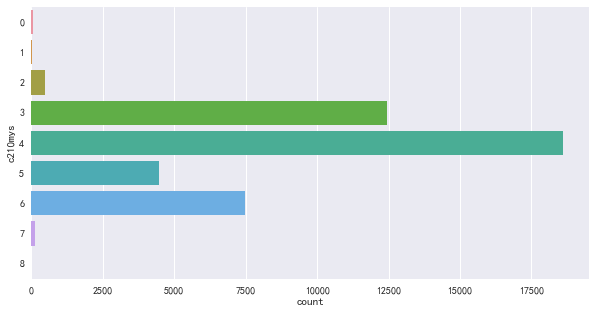

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(y='c210mys',data=df)
plt.show()

#### 查看不同的学历之间是否购买保险的人数

In [30]:
df.head(1)

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,1.0,5,3,8,Y,Y,C,CA,67.0,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8


Text(0, 0.5, '购买数量')

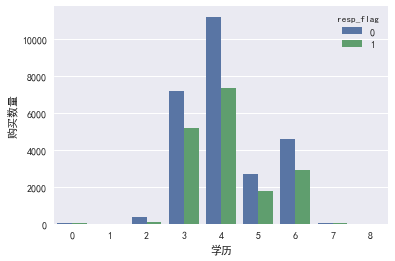

In [31]:
#plt.figure(figsize=(10,5))
sns.countplot(x='c210mys',hue='resp_flag',data=df)
plt.xlabel('学历')
plt.ylabel('购买数量')

### 不同的县级别是否购买保险的人数

Text(0, 0.5, '购买数量')

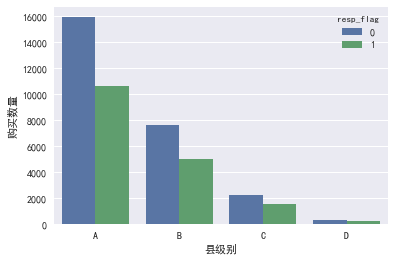

In [32]:
#plt.figure(figsize=(10,5))
sns.countplot(x='N2NCY',hue='resp_flag',data=df)
plt.xlabel('县级别')
plt.ylabel('购买数量')

## 缺失值填充

In [33]:
#写一个循环,把所有缺失列的数据类型添加到列表中
temp=[]
for i in NA.Var:
    temp.append(df[i].dtypes)   

In [34]:
NA['数据类型']=temp

In [35]:
NA

,Var,NA_count,数据类型
0,AASN,10,object
1,ASKN,8,object
2,COLLEGE,8,object
3,MOBPLUS,7,object
4,N2NCY,10,object
5,NY8Y9,9,object
6,POEP,8,object
7,LIVEWELL,5,float64
8,HOMSTAT,10,object
9,HINSUB,11,object


空值填充策略：

分类变量：通常分类水平出现的次数多，出现概率就搞，众数填充

数值型变量：一般可以用均值填充（数据中的幸福指数，收入排名都是分类变量）

In [36]:
#单独取出缺失列观察下数据类型
df[list(NA.Var)].head(10)

,AASN,ASKN,COLLEGE,MOBPLUS,N2NCY,NY8Y9,POEP,LIVEWELL,HOMSTAT,HINSUB,age,c210b200,c210cip,c210hmi,c210hva,c210mah,c210psu,c210wht,ilor,meda
0,N,N,N,S,A,N,Y,1.0,Y,C,67.0,11.0,74.0,90.0,738.0,64.0,71.0,79.0,15.0,64.0
1,N,N,N,P,A,N,N,4.0,Y,U,76.0,6.0,69.0,84.0,494.0,56.0,99.0,65.0,17.0,61.0
2,N,N,N,M,A,N,N,3.0,Y,U,67.0,NaN,32.0,50.0,516.0,50.0,62.0,47.0,20.0,61.0
3,N,N,N,S,B,N,Y,1.0,Y,C,71.0,NaN,82.0,103.0,473.0,52.0,99.0,71.0,4.0,62.0
4,N,N,Y,M,B,N,N,3.0,U,A,75.0,NaN,38.0,55.0,523.0,50.0,36.0,65.0,9.0,NaN
5,Y,N,N,M,A,N,NaN,4.0,Y,B,74.0,NaN,4.0,28.0,NaN,58.0,80.0,53.0,17.0,NaN
6,N,N,Y,M,A,N,NaN,1.0,Y,U,NaN,NaN,89.0,118.0,NaN,57.0,NaN,75.0,21.0,NaN
7,N,N,N,U,A,N,NaN,4.0,U,U,NaN,7.0,NaN,85.0,NaN,NaN,NaN,83.0,8.0,NaN
8,N,N,N,M,A,N,NaN,2.0,Y,C,NaN,3.0,NaN,72.0,NaN,NaN,NaN,71.0,41.0,NaN
9,N,N,N,S,A,N,NaN,4.0,U,U,NaN,1.0,55.0,69.0,NaN,NaN,NaN,76.0,12.0,NaN


In [37]:
s="age c210b200 c210cip c210hmi c210hva c210mah c210psu c210wht ilor meda"
list1=s.split()
list1#这十个特征是连续数值的特征用均值填充

['age',
 'c210b200',
 'c210cip',
 'c210hmi',
 'c210hva',
 'c210mah',
 'c210psu',
 'c210wht',
 'ilor',
 'meda']

In [38]:
L_fenlei=[]
for i in list(NA.Var):
    if i not in list1:
        L_fenlei.append(i)
L_fenlei#这十个特征用众数填充

['AASN',
 'ASKN',
 'COLLEGE',
 'MOBPLUS',
 'N2NCY',
 'NY8Y9',
 'POEP',
 'LIVEWELL',
 'HOMSTAT',
 'HINSUB']

In [39]:
for i in list1:
    df[i].fillna(df[i].mean(),inplace=True)

In [40]:
for i in L_fenlei:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [41]:
#看一下还有没有缺失值
df.isnull().sum()

KBM_INDV_ID    0
resp_flag      0
GEND           0
CA00           0
CA03           0
CA06           0
CA11           0
CA16           0
AART           0
ADBT           0
ADEP           0
AHBP           0
AHCH           0
ARES           0
AHRT           0
AASN           0
ADGS           0
AHRL           0
ASKN           0
AVIS           0
BANK           0
COLLEGE        0
FINI           0
INLI           0
INMEDI         0
INVE           0
IOLP           0
MOBPLUS        0
N2NCY          0
NY8Y9          0
              ..
NAH19          0
NPH19          0
POC19          0
HOMSTAT        0
HINSUB         0
STATE_NAME     0
age            0
c210apvt       0
c210b200       0
c210blu        0
c210bpvt       0
c210cip        0
c210ebi        0
c210hmi        0
c210hva        0
c210kses       0
c210mah        0
c210mob        0
c210mys        0
c210pdv        0
c210pmr        0
c210poo        0
c210psu        0
c210pwc        0
c210wht        0
ilor           0
meda           0
pdpe          

## 变量编码

In [42]:
#删除用户ID
del df['KBM_INDV_ID']

In [43]:
df.head(1)

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,M,4,0,5,1,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,1.0,5,3,8,Y,Y,C,CA,67.0,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8


选取object数据类型的特征，将其编码成数值型

In [44]:
df_object=df.select_dtypes('object')
df_object.head(1)

,GEND,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,POC19,HOMSTAT,HINSUB,STATE_NAME
0,M,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,Y,Y,C,CA


In [45]:
from sklearn.preprocessing import OrdinalEncoder #对特征数值型编码

In [46]:
df_object=OrdinalEncoder().fit_transform(df_object)

In [47]:
df_object

array([[1., 0., 0., ..., 4., 2., 0.],
       [1., 0., 0., ..., 4., 3., 0.],
       [0., 0., 0., ..., 4., 3., 0.],
       ...,
       [1., 0., 0., ..., 4., 3., 0.],
       [1., 0., 0., ..., 4., 2., 4.],
       [1., 0., 0., ..., 0., 1., 5.]])

In [48]:
df_copy=df.copy()
#误操作还原数据
#df=df_copy.copy()

In [49]:
#进行数据的编码转换
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OrdinalEncoder().fit_transform(df[[i]])

In [50]:
df.head()

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,1.0,4,0,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,3,8,2.0,4.0,2.0,0.0,67.0,99,11.000000,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.000000,42,8,8
1,0,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0,1,1,1.0,4.0,3.0,0.0,76.0,98,6.000000,15,2,69.0,69,84.0,494.0,97,56.0,0,4,15,44,81,99.0,37,65.0,17.0,61.000000,46,6,3
2,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,1,1,1.0,4.0,3.0,0.0,67.0,88,14.784842,26,12,32.0,44,50.0,516.0,83,50.0,0,4,17,38,44,62.0,44,47.0,20.0,61.000000,46,7,3
3,0,0.0,0,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4,5,2.0,4.0,2.0,0.0,71.0,96,14.784842,15,4,82.0,82,103.0,473.0,105,52.0,0,4,14,45,71,99.0,39,71.0,4.0,62.000000,37,8,9
4,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,0,1,1,1.0,3.0,0.0,0.0,75.0,88,14.784842,9,12,38.0,47,55.0,523.0,89,50.0,10,4,29,32,13,36.0,15,65.0,9.0,50.834872,37,4,3


方法2

In [51]:
df=df_copy.copy()

In [52]:
df_copy=df.copy()

将二分类以上的特征进one-hot编码

In [53]:
#统计一下有多少个2分类以上的
two=0
over_two=0
for i in df:
    if df[i].dtypes=='object':
        if df[i].nunique()==2:
            two+=1
        else:
            over_two+=1
print(two)
print(over_two)


34
7


In [54]:
#map enumerate(打包)
df['GEND'].map(dict([(j,i) for i,j in enumerate(df['GEND'].unique())]))

0        0
1        0
2        1
3        1
4        1
5        1
6        1
7        0
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       0
16       1
17       1
18       1
19       1
20       0
21       0
22       0
23       0
24       1
25       1
26       1
27       1
28       1
29       1
        ..
43636    1
43637    1
43638    1
43639    1
43640    0
43641    1
43642    0
43643    0
43644    1
43645    1
43646    1
43647    1
43648    1
43649    0
43650    1
43651    1
43652    1
43653    1
43654    1
43655    1
43656    1
43657    1
43658    1
43659    0
43660    1
43661    1
43662    1
43663    0
43664    0
43665    0
Name: GEND, Length: 43666, dtype: int64

In [55]:
columns=[]
for i in df:
    if df[i].dtypes=='object':
        if df[i].nunique()==2:
            df[i]=df[i].map(dict([(j,i) for i,j in enumerate(df[i].unique())]))
        else:
            columns.append(i)

将超过二分类的进行one-hot编码

In [56]:
columns

['MOBPLUS', 'N2NCY', 'N6N64', 'POC19', 'HOMSTAT', 'HINSUB', 'STATE_NAME']

In [57]:
#转换哑变量
dummies=pd.get_dummies(df[columns],drop_first=True)

In [58]:
dummies.shape

(43666, 27)

In [59]:
df.shape

(43666, 75)

In [60]:
df2=df.drop(columns=columns)

In [61]:
df2.shape

(43666, 68)

In [62]:
df_final=pd.concat([df2,dummies],axis=1,sort=False)
df_final.shape

(43666, 95)

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 95 columns):
resp_flag        43666 non-null int64
GEND             43666 non-null int64
CA00             43666 non-null int64
CA03             43666 non-null int64
CA06             43666 non-null int64
CA11             43666 non-null int64
CA16             43666 non-null int64
AART             43666 non-null int64
ADBT             43666 non-null int64
ADEP             43666 non-null int64
AHBP             43666 non-null int64
AHCH             43666 non-null int64
ARES             43666 non-null int64
AHRT             43666 non-null int64
AASN             43666 non-null int64
ADGS             43666 non-null int64
AHRL             43666 non-null int64
ASKN             43666 non-null int64
AVIS             43666 non-null int64
BANK             43666 non-null int64
COLLEGE          43666 non-null int64
FINI             43666 non-null int64
INLI             43666 non-null int64
INMEDI           

## 建模

In [64]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [65]:
df=df_final.copy()

In [66]:
#提取特征和标签
X=df.iloc[:,1:]
y=df['resp_flag']

In [67]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)

In [68]:
clf=DecisionTreeClassifier()
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.5910687022900764

## 尝试使用最小叶节点样本数量和最小分割样本数量调参

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
#param_grid={'min_samples_leaf':list(range(1000,6000,100)),'min_samples_split':list(range(4000,6000,100))}
#GR = GridSearchCV(tree.DecisionTreeClassifier(),param_grid,cv=5)
#GR.fit(Xtrain,Ytrain)

#GR.best_params#1500,4000

In [71]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=1500,min_samples_split=4000)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.6499236641221374

## 画决策树

In [72]:
import graphviz

In [73]:
faetures=list(df.columns[1:])

In [74]:
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=faetures,class_names=['NP','P'],filled=True,rounded=True)

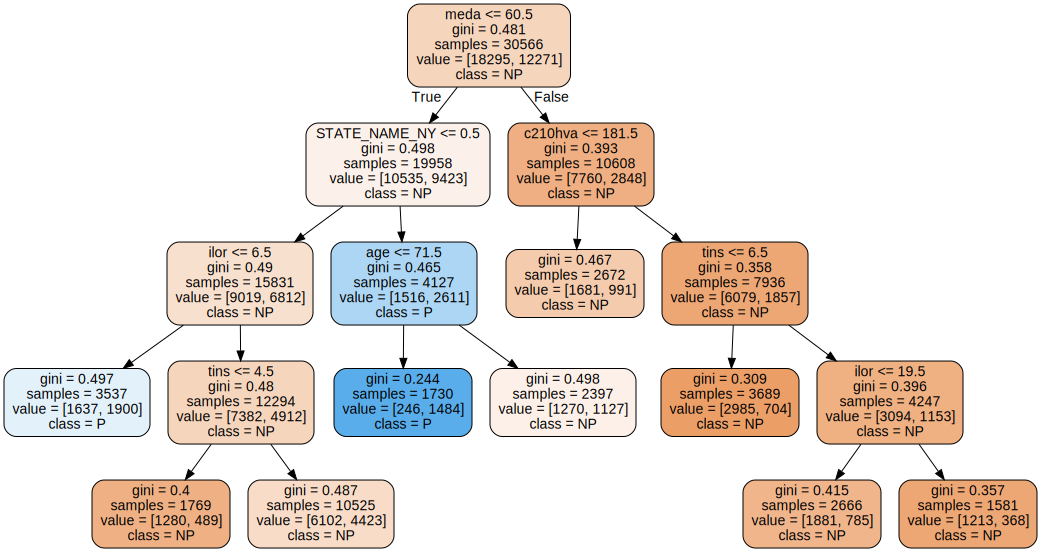

In [75]:
graph=graphviz.Source(dot_data)
graph

In [76]:
# 输出PDF文件
graph.render('model1')

'model1.pdf'

## 对数据进行PCA压缩

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca=PCA(n_components=20)
Xtrain_pca=pca.fit_transform(Xtrain)

In [79]:
Xtrain_pca.shape

(30566, 20)

In [80]:
(pca.explained_variance_ratio_).sum()

0.9994909575433721

In [81]:
pd.DataFrame(Xtrain_pca).columns

RangeIndex(start=0, stop=20, step=1)

In [82]:
Xtest_pca=pca.transform(Xtest)

In [83]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=1500,min_samples_split=4000)
clf.fit(Xtrain_pca,Ytrain)
clf.score(Xtest_pca,Ytest)

0.6040458015267176

举个例子(PCA)

In [84]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [85]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [86]:
X=iris.data
y=iris.target

In [87]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
#调用PCA建模
pca=PCA(n_components=2)
pca=pca.fit(X)
X_dr=pca.transform(X)

In [89]:
X_dr.shape

(150, 2)

In [90]:
X_dr[y==0,0]

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

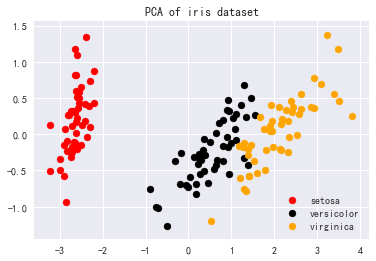

In [91]:
plt.figure()
plt.scatter(X_dr[y==0,0],X_dr[y==0,1],c='red',label=iris.target_names[0])

plt.scatter(X_dr[y==1,0],X_dr[y==1,1],c='k',label=iris.target_names[1])

plt.scatter(X_dr[y==2,0],X_dr[y==2,1],c='orange',label=iris.target_names[2])

plt.legend()
plt.title('PCA of iris dataset')
plt.show()

### 可解释方差贡献率

In [92]:
pca.explained_variance_#贡献量

array([4.22824171, 0.24267075])

In [93]:
pca.explained_variance_ratio_#贡献率

array([0.92461872, 0.05306648])

In [94]:
(pca.explained_variance_ratio_).sum()

0.977685206318795

In [95]:
import numpy as np

([<matplotlib.axis.XTick at 0x17787da0>,
 <a list of 4 Text xticklabel objects>)

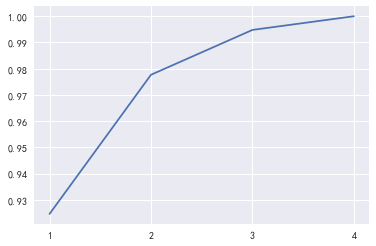

In [96]:
## 累计可解释方差贡献率曲线
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])

In [97]:
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle
#可以发现，mle为我们自动选择了了3个特征
pca_mle.explained_variance_ratio_.sum()

0.9947878161267247

In [98]:
##按信息量量占比选超参数
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [99]:
(pca_f.explained_variance_ratio_).sum()

0.977685206318795